# DVD Rental Database Advanced SQL Analysis
## Comprehensive Analysis of Business-Critical Metrics

### Author's Note
*This portfolio demonstrates advanced SQL expertise through progressively complex queries addressing real business needs while showcasing technical mastery of SQL concepts.*

### Executive Summary
This analysis leverages advanced SQL techniques to extract actionable business insights from the DVD rental database. 
Through 14 carefully crafted queries, we explore everything from basic inventory analysis to complex customer lifetime value 
calculations, providing a comprehensive view of business operations and opportunities.

### Technical Competencies Demonstrated
- DISTINCT operations and basic filtering
- Advanced CASE statements and conditional logic
- Complex JOIN operations (INNER, LEFT, Multiple)
- Sophisticated subqueries (Correlated & Uncorrelated)
- Advanced aggregation techniques
- Date/Time manipulation
- String operations and concatenation
- Performance optimization patterns

### Database Context
The analysis utilizes a DVD rental database with interconnected tables including:
- films and categories
- customer and payment information
- rental records
- actor and staff details
- geographical data (addresses, cities, countries)

---
###  NOTE: The database connection below uses local credentials. Viewers of this notebook will see the query outputs and charts,  but won't be able to re-run them.
---

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Load environment variables from .env
load_dotenv()

# Configure plotting style
sns.set_theme(style="whitegrid")

# Fetch credentials from environment
db_user = os.getenv("PG_USER")
db_password = os.getenv("PG_PASSWORD")
db_host = os.getenv("PG_HOST")
db_port = os.getenv("PG_PORT")
db_name = os.getenv("PG_DATABASE")

# Connect to PostgreSQL using SQLAlchemy
try:
    # Construct the connection URL using environment variables
    engine = create_engine(f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")
    print("Connection to PostgreSQL established successfully using SQLAlchemy.\n")
except Exception as e:
    print("Error connecting to database:", e)

# Helper function for query execution
def run_query(sql_query):
    try:
        return pd.read_sql(sql_query, engine)
    except Exception as e:
        print("Error executing query:", e)
        return None

Connection to PostgreSQL established successfully using SQLAlchemy.




#  ─────────────────────────────────────────────
# Analysis & Solutions
#  ─────────────────────────────────────────────


# *Query Set 1: Basic Inventory Analysis*


---
## Query 1: Replacement Cost Analysis
---
**Business Need**: Identify all unique replacement costs for inventory valuation.

In [2]:
q1 = """
SELECT DISTINCT replacement_cost 
FROM film
ORDER BY 1;
"""
df1 = run_query(q1)
print("QUERY 1 RESULTS (showing first 5 rows):")
display(df1.head(5))

QUERY 1 RESULTS (showing first 5 rows):


,replacement_cost
0,9.99
1,10.99
2,11.99
3,12.99
4,13.99


**Key Finding**: Minimum replacement cost is $9.99  
**Business Impact**: Establishes baseline for inventory investment decisions

---
## Query 2: Cost Range Distribution
---
**Business Need**: Segment inventory into strategic price bands for management.

QUERY 2 RESULTS:


,cost_range,film_count
0,high,236
1,low,514
2,medium,250


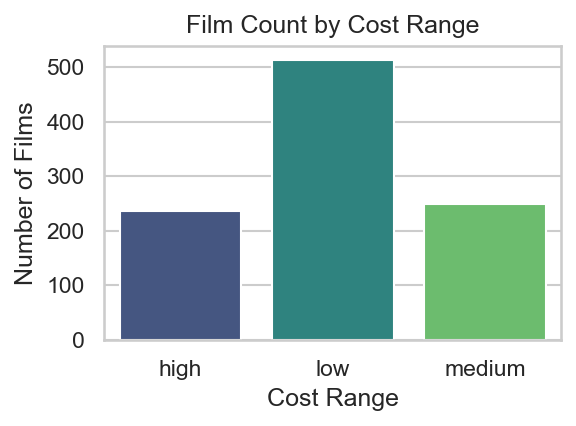

In [3]:
q2 = """
SELECT 
    CASE 
        WHEN replacement_cost BETWEEN 9.99 AND 19.99 THEN 'low'
        WHEN replacement_cost BETWEEN 20 AND 24.99 THEN 'medium'
        ELSE 'high'
    END as cost_range,
    COUNT(*) as film_count
FROM film
GROUP BY cost_range
ORDER BY cost_range;
"""
df2 = run_query(q2)
print("QUERY 2 RESULTS:")
display(df2)

#  Distribution of film counts by cost range
plt.figure(figsize=(4,3),dpi=150)
sns.barplot(data=df2, x='cost_range', y='film_count', hue='cost_range', palette='viridis')
plt.title("Film Count by Cost Range")
plt.xlabel("Cost Range")
plt.ylabel("Number of Films")
plt.tight_layout()
plt.show()

**Key Finding**: 514 films in 'low' cost range  
**Strategic Value**: Enables data-driven pricing and inventory decisions